In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import numpy as np
from datetime import datetime
from geopy.geocoders import Nominatim
import geopy.distance

In [ ]:
b14=pd.read_excel('F:\data science\CODIGO\ease(business)14.xlsx')
b14['class']=b14['airline'].apply(lambda x : 'business' )
b14

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class
0,LOT Polish Airlines,IST-WAW-NRT,19h 00m,|1-Stop,18:25,19:25,31-Jan-2023,01-Feb-2023,"149,257",business
1,Asiana Airlines,IST-ICN-NRT,32h 45m,|1-Stop,21:05,11:50,31-Jan-2023,02-Feb-2023,"191,218",business
2,Ethiopian Airlines,IST-ADD-NRT,30h 05m,|1-Stop,07:35,19:40,31-Jan-2023,01-Feb-2023,"224,498",business
3,LOT Polish Airlines,IST-WAW-NRT,20h 00m,|1-Stop,17:25,19:25,31-Jan-2023,01-Feb-2023,"225,866",business
4,KLM Airlines,IST-CDG-AMS-NRT,53h 50m,|2+Stop,07:35,19:25,31-Jan-2023,02-Feb-2023,"250,783",business
...,...,...,...,...,...,...,...,...,...,...
8748,China Eastern Airlines,PKX-XMN-SHA,17h 05m,|1-Stop,16:35,09:40,14-Dec-2022,15-Dec-2022,"163,615",business
8749,China Eastern Airlines,PKX-XIY-SHA,05h 30m,|1-Stop,08:50,14:20,14-Dec-2022,14-Dec-2022,"182,450",business
8750,China Eastern Airlines,PKX-WUH-SHA,05h 55m,|1-Stop,12:00,17:55,14-Dec-2022,14-Dec-2022,"183,279",business
8751,Air China,PEK-CGO-PVG,19h 10m,|1-Stop,15:10,10:20,14-Dec-2022,15-Dec-2022,"267,754",business


In [ ]:
e14=pd.read_excel('F:\data science\CODIGO\ease(economy)14.xlsx')
e14['class']=e14['airline'].apply(lambda x : 'economy' )
e14

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class
0,Saudi Arabian Airlines,TIF-JED-TUU,04h 25m,|1-Stop,13:30,17:55,31-Jan-2023,31-Jan-2023,"8,969",economy
1,Saudi Arabian Airlines,TIF-RUH-TUU,05h 40m,|1-Stop,07:35,13:15,31-Jan-2023,31-Jan-2023,"15,661",economy
2,Saudi Arabian Airlines,TIF-RUH-JED-TUU,10h 20m,|2+Stop,07:35,17:55,31-Jan-2023,31-Jan-2023,"16,149",economy
3,Saudi Arabian Airlines,TIF-JED-RUH-TUU,07h 25m,|2+Stop,13:30,20:55,31-Jan-2023,31-Jan-2023,"17,041",economy
4,National Air Services,TIF-DMM-JED-TUU,14h 15m,|2+Stop,19:05,09:20,31-Jan-2023,01-Feb-2023,"20,165",economy
...,...,...,...,...,...,...,...,...,...,...
14330,Air China,PEK-HET-PVG,06h 10m,|1-Stop,15:40,21:50,14-Dec-2022,14-Dec-2022,"68,244",economy
14331,Air China,PEK-SHA,02h 25m,|Non-Stop,09:30,11:55,14-Dec-2022,14-Dec-2022,"70,850",economy
14332,Air China,PEK-CSX-PVG,07h 05m,|1-Stop,08:30,15:35,14-Dec-2022,14-Dec-2022,"80,920",economy
14333,Air China,PEK-CTU-PVG,07h 00m,|1-Stop,16:30,23:30,14-Dec-2022,14-Dec-2022,"100,825",economy


In [ ]:
fp14 = pd.concat([b14,e14]).drop_duplicates()
 

fp14 = fp14.reset_index(drop=True)
fp14

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class
0,LOT Polish Airlines,IST-WAW-NRT,19h 00m,|1-Stop,18:25,19:25,31-Jan-2023,01-Feb-2023,"149,257",business
1,Asiana Airlines,IST-ICN-NRT,32h 45m,|1-Stop,21:05,11:50,31-Jan-2023,02-Feb-2023,"191,218",business
2,Ethiopian Airlines,IST-ADD-NRT,30h 05m,|1-Stop,07:35,19:40,31-Jan-2023,01-Feb-2023,"224,498",business
3,LOT Polish Airlines,IST-WAW-NRT,20h 00m,|1-Stop,17:25,19:25,31-Jan-2023,01-Feb-2023,"225,866",business
4,KLM Airlines,IST-CDG-AMS-NRT,53h 50m,|2+Stop,07:35,19:25,31-Jan-2023,02-Feb-2023,"250,783",business
...,...,...,...,...,...,...,...,...,...,...
23083,Air China,PEK-HET-PVG,06h 10m,|1-Stop,15:40,21:50,14-Dec-2022,14-Dec-2022,"68,244",economy
23084,Air China,PEK-SHA,02h 25m,|Non-Stop,09:30,11:55,14-Dec-2022,14-Dec-2022,"70,850",economy
23085,Air China,PEK-CSX-PVG,07h 05m,|1-Stop,08:30,15:35,14-Dec-2022,14-Dec-2022,"80,920",economy
23086,Air China,PEK-CTU-PVG,07h 00m,|1-Stop,16:30,23:30,14-Dec-2022,14-Dec-2022,"100,825",economy


In [ ]:
bookingday = datetime(2022, 12, 14, 0, 0, 0)

fp14['days left']=fp14['dep_date'].apply(lambda x : (datetime.strptime(x, '%d-%b-%Y') - bookingday).days )

In [ ]:
b18=pd.read_excel('F:\data science\CODIGO\ease(business)18.xlsx')
b18['class']=b18['airline'].apply(lambda x : 'business' )
b18

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class
0,Asiana Airlines,IST-ICN-NRT,17h 40m,|1-Stop,17:40,17:20,31-Mar-2023,01-Apr-2023,"200,560",business
1,Asiana Airlines,IST-ICN-HND,18h 15m,|1-Stop,17:40,17:55,31-Mar-2023,01-Apr-2023,"201,696",business
2,Ethiopian Airlines,IST-ADD-NRT,37h 30m,|1-Stop,00:10,19:40,31-Mar-2023,01-Apr-2023,"220,759",business
3,Asiana Airlines,IST-ICN-NRT,13h 30m,|1-Stop,15:50,11:20,31-Mar-2023,01-Apr-2023,"226,043",business
4,Asiana Airlines,IST-ICN-NRT,19h 30m,|1-Stop,15:50,17:20,31-Mar-2023,01-Apr-2023,"229,108",business
...,...,...,...,...,...,...,...,...,...,...
8088,Emirates Airlines,EZE-DXB-BKK-SYD,67h 10m,|2+Stop,22:20,07:30,01-Feb-2023,05-Feb-2023,"949,772",business
8089,Emirates Airlines,EZE-DXB-SYD,34h 10m,|1-Stop,22:20,22:30,01-Feb-2023,03-Feb-2023,"950,077",business
8090,Emirates Airlines,EZE-DXB-BKK-SYD,67h 10m,|2+Stop,22:20,07:30,01-Feb-2023,05-Feb-2023,"951,551",business
8091,Qatar Airways,EZE-MAD-DOH-SYD,38h 30m,|2+Stop,14:15,18:45,01-Feb-2023,03-Feb-2023,"966,327",business


In [ ]:
e18=pd.read_excel('F:\data science\CODIGO\ease(economy)18.xlsx')
e18['class']=e18['airline'].apply(lambda x : 'economy' )
e18

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class
0,China Eastern Airlines,DLC-WUH,04h 15m,|1-Stop,13:15,17:30,31-Mar-2023,31-Mar-2023,"19,720",economy
1,China Eastern Airlines,DLC-NGB-WUH,06h 05m,|1-Stop,10:55,17:00,31-Mar-2023,31-Mar-2023,"25,897",economy
2,China Eastern Airlines,DLC-TAO-WUH,26h 45m,|1-Stop,13:15,16:00,31-Mar-2023,01-Apr-2023,"28,157",economy
3,China Eastern Airlines,DLC-YNT-WUH,18h 00m,|1-Stop,21:10,15:10,31-Mar-2023,01-Apr-2023,"28,632",economy
4,Air China,DLC-TSN-WUH,25h 10m,|1-Stop,16:55,18:05,31-Mar-2023,01-Apr-2023,"30,292",economy
...,...,...,...,...,...,...,...,...,...,...
12023,Royal Jordanian,CAI-AMM-DOH,06h 20m,|1-Stop,09:05,16:25,01-Feb-2023,01-Feb-2023,"49,252",economy
12024,Egypt Airways,CAI-AMM-DOH,18h 45m,|1-Stop,07:55,03:40,01-Feb-2023,02-Feb-2023,"82,765",economy
12025,Egypt Airways,CAI-AMM-DOH,09h 30m,|1-Stop,17:10,03:40,01-Feb-2023,02-Feb-2023,"82,848",economy
12026,Oman Air,CAI-MCT-DOH,24h 30m,|1-Stop,22:00,23:30,01-Feb-2023,02-Feb-2023,"89,140",economy


In [ ]:
fp18 = pd.concat([b18,e18]).drop_duplicates()
 

fp18 = fp18.reset_index(drop=True)
fp18

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class
0,Asiana Airlines,IST-ICN-NRT,17h 40m,|1-Stop,17:40,17:20,31-Mar-2023,01-Apr-2023,"200,560",business
1,Asiana Airlines,IST-ICN-HND,18h 15m,|1-Stop,17:40,17:55,31-Mar-2023,01-Apr-2023,"201,696",business
2,Ethiopian Airlines,IST-ADD-NRT,37h 30m,|1-Stop,00:10,19:40,31-Mar-2023,01-Apr-2023,"220,759",business
3,Asiana Airlines,IST-ICN-NRT,13h 30m,|1-Stop,15:50,11:20,31-Mar-2023,01-Apr-2023,"226,043",business
4,Asiana Airlines,IST-ICN-NRT,19h 30m,|1-Stop,15:50,17:20,31-Mar-2023,01-Apr-2023,"229,108",business
...,...,...,...,...,...,...,...,...,...,...
20116,Royal Jordanian,CAI-AMM-DOH,06h 20m,|1-Stop,09:05,16:25,01-Feb-2023,01-Feb-2023,"49,252",economy
20117,Egypt Airways,CAI-AMM-DOH,18h 45m,|1-Stop,07:55,03:40,01-Feb-2023,02-Feb-2023,"82,765",economy
20118,Egypt Airways,CAI-AMM-DOH,09h 30m,|1-Stop,17:10,03:40,01-Feb-2023,02-Feb-2023,"82,848",economy
20119,Oman Air,CAI-MCT-DOH,24h 30m,|1-Stop,22:00,23:30,01-Feb-2023,02-Feb-2023,"89,140",economy


In [ ]:
bookingday = datetime(2022, 12, 18, 0, 0, 0)

fp18['days left']=fp18['dep_date'].apply(lambda x : (datetime.strptime(x, '%d-%b-%Y') - bookingday).days )

In [ ]:
fp = pd.concat([fp18,fp14]).drop_duplicates()
 

fp = fp.reset_index(drop=True)
fp

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,days left
0,Asiana Airlines,IST-ICN-NRT,17h 40m,|1-Stop,17:40,17:20,31-Mar-2023,01-Apr-2023,"200,560",business,103
1,Asiana Airlines,IST-ICN-HND,18h 15m,|1-Stop,17:40,17:55,31-Mar-2023,01-Apr-2023,"201,696",business,103
2,Ethiopian Airlines,IST-ADD-NRT,37h 30m,|1-Stop,00:10,19:40,31-Mar-2023,01-Apr-2023,"220,759",business,103
3,Asiana Airlines,IST-ICN-NRT,13h 30m,|1-Stop,15:50,11:20,31-Mar-2023,01-Apr-2023,"226,043",business,103
4,Asiana Airlines,IST-ICN-NRT,19h 30m,|1-Stop,15:50,17:20,31-Mar-2023,01-Apr-2023,"229,108",business,103
...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,PEK-HET-PVG,06h 10m,|1-Stop,15:40,21:50,14-Dec-2022,14-Dec-2022,"68,244",economy,0
43205,Air China,PEK-SHA,02h 25m,|Non-Stop,09:30,11:55,14-Dec-2022,14-Dec-2022,"70,850",economy,0
43206,Air China,PEK-CSX-PVG,07h 05m,|1-Stop,08:30,15:35,14-Dec-2022,14-Dec-2022,"80,920",economy,0
43207,Air China,PEK-CTU-PVG,07h 00m,|1-Stop,16:30,23:30,14-Dec-2022,14-Dec-2022,"100,825",economy,0


In [ ]:
fp.head(10)

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,days left
0,Asiana Airlines,IST-ICN-NRT,17h 40m,|1-Stop,17:40,17:20,31-Mar-2023,01-Apr-2023,"200,560",business,103
1,Asiana Airlines,IST-ICN-HND,18h 15m,|1-Stop,17:40,17:55,31-Mar-2023,01-Apr-2023,"201,696",business,103
2,Ethiopian Airlines,IST-ADD-NRT,37h 30m,|1-Stop,00:10,19:40,31-Mar-2023,01-Apr-2023,"220,759",business,103
3,Asiana Airlines,IST-ICN-NRT,13h 30m,|1-Stop,15:50,11:20,31-Mar-2023,01-Apr-2023,"226,043",business,103
4,Asiana Airlines,IST-ICN-NRT,19h 30m,|1-Stop,15:50,17:20,31-Mar-2023,01-Apr-2023,"229,108",business,103
5,Ethiopian Airlines,IST-ADD-NRT,43h 05m,|1-Stop,18:35,19:40,31-Mar-2023,02-Apr-2023,"288,359",business,103
6,Qatar Airways,SAW-DOH-NRT,16h 45m,|1-Stop,19:50,18:35,31-Mar-2023,01-Apr-2023,"302,624",business,103
7,Qatar Airways,SAW-DOH-NRT,29h 10m,|1-Stop,07:25,18:35,31-Mar-2023,01-Apr-2023,"302,919",business,103
8,Qatar Airways,IST-DOH-NRT,16h 50m,|1-Stop,19:45,18:35,31-Mar-2023,01-Apr-2023,"318,538",business,103
9,Singapore Airlines,IST-SIN-HND,26h 20m,|1-Stop,13:30,21:50,31-Mar-2023,01-Apr-2023,"349,048",business,103


In [ ]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43209 entries, 0 to 43208
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   airline    43209 non-null  object
 1   route      43209 non-null  object
 2   duration   43209 non-null  object
 3   if_stop    43209 non-null  object
 4   dep_time   43209 non-null  object
 5   arr_time   43209 non-null  object
 6   dep_date   43209 non-null  object
 7   arr_date   43209 non-null  object
 8   price      43209 non-null  object
 9   class      43209 non-null  object
 10  days left  43209 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.6+ MB


In [ ]:
fp["price"]=fp["price"].apply(lambda x : x.split(' ')[0].replace(',',''))

In [ ]:
fp

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,days left
0,Asiana Airlines,IST-ICN-NRT,17h 40m,|1-Stop,17:40,17:20,31-Mar-2023,01-Apr-2023,200560,business,103
1,Asiana Airlines,IST-ICN-HND,18h 15m,|1-Stop,17:40,17:55,31-Mar-2023,01-Apr-2023,201696,business,103
2,Ethiopian Airlines,IST-ADD-NRT,37h 30m,|1-Stop,00:10,19:40,31-Mar-2023,01-Apr-2023,220759,business,103
3,Asiana Airlines,IST-ICN-NRT,13h 30m,|1-Stop,15:50,11:20,31-Mar-2023,01-Apr-2023,226043,business,103
4,Asiana Airlines,IST-ICN-NRT,19h 30m,|1-Stop,15:50,17:20,31-Mar-2023,01-Apr-2023,229108,business,103
...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,PEK-HET-PVG,06h 10m,|1-Stop,15:40,21:50,14-Dec-2022,14-Dec-2022,68244,economy,0
43205,Air China,PEK-SHA,02h 25m,|Non-Stop,09:30,11:55,14-Dec-2022,14-Dec-2022,70850,economy,0
43206,Air China,PEK-CSX-PVG,07h 05m,|1-Stop,08:30,15:35,14-Dec-2022,14-Dec-2022,80920,economy,0
43207,Air China,PEK-CTU-PVG,07h 00m,|1-Stop,16:30,23:30,14-Dec-2022,14-Dec-2022,100825,economy,0


In [ ]:
fp['price']=fp['price'].astype(int)

In [ ]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43209 entries, 0 to 43208
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   airline    43209 non-null  object
 1   route      43209 non-null  object
 2   duration   43209 non-null  object
 3   if_stop    43209 non-null  object
 4   dep_time   43209 non-null  object
 5   arr_time   43209 non-null  object
 6   dep_date   43209 non-null  object
 7   arr_date   43209 non-null  object
 8   price      43209 non-null  int32 
 9   class      43209 non-null  object
 10  days left  43209 non-null  int64 
dtypes: int32(1), int64(1), object(9)
memory usage: 3.5+ MB


In [ ]:
fp['if_stop'].unique()

array(['|1-Stop', '|2+Stop', '|Non-Stop'], dtype=object)

In [ ]:
len(fp['route'][0].split('-'))-2

1

In [ ]:
def num_stops(route):
    stop_num=len(route.split('-'))-2
    return stop_num

In [ ]:
fp['if_stop']=fp['route'].apply(num_stops)

In [ ]:
fp['if_stop'].unique()

array([1, 2, 0, 3], dtype=int64)

In [ ]:
fp['duration']

0        17h 40m
1        18h 15m
2        37h 30m
3        13h 30m
4        19h 30m
          ...   
43204    06h 10m
43205    02h 25m
43206    07h 05m
43207    07h 00m
43208    06h 55m
Name: duration, Length: 43209, dtype: object

In [ ]:
x=fp['duration'][0].replace('h','').replace('m','')
x = int(x.split(' ')[0]) + int(x.split(' ')[1])
x

57

In [ ]:
def flight_duration(d):
    d = d.replace('h','').replace('m','')
    d = float(d.split(' ')[0]) + float(d.split(' ')[1])/60
    return d

In [ ]:
fp['duration']=fp['duration'].apply(flight_duration)

In [ ]:
fp

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,days left
0,Asiana Airlines,IST-ICN-NRT,17.666667,1,17:40,17:20,31-Mar-2023,01-Apr-2023,200560,business,103
1,Asiana Airlines,IST-ICN-HND,18.250000,1,17:40,17:55,31-Mar-2023,01-Apr-2023,201696,business,103
2,Ethiopian Airlines,IST-ADD-NRT,37.500000,1,00:10,19:40,31-Mar-2023,01-Apr-2023,220759,business,103
3,Asiana Airlines,IST-ICN-NRT,13.500000,1,15:50,11:20,31-Mar-2023,01-Apr-2023,226043,business,103
4,Asiana Airlines,IST-ICN-NRT,19.500000,1,15:50,17:20,31-Mar-2023,01-Apr-2023,229108,business,103
...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,PEK-HET-PVG,6.166667,1,15:40,21:50,14-Dec-2022,14-Dec-2022,68244,economy,0
43205,Air China,PEK-SHA,2.416667,0,09:30,11:55,14-Dec-2022,14-Dec-2022,70850,economy,0
43206,Air China,PEK-CSX-PVG,7.083333,1,08:30,15:35,14-Dec-2022,14-Dec-2022,80920,economy,0
43207,Air China,PEK-CTU-PVG,7.000000,1,16:30,23:30,14-Dec-2022,14-Dec-2022,100825,economy,0


In [ ]:
def weekend (date):
    if datetime.strptime(date, '%d-%b-%Y').weekday() == 5 or datetime.strptime(date, '%d-%b-%Y').weekday() == 6:
        return 1
    else:
        return 0

In [ ]:
fp['weekends']=fp['dep_date'].apply(weekend)

In [ ]:
def daypart(time):
    time=datetime.strptime(time, '%H:%M').time()
    if time >= (datetime.strptime('06:00', '%H:%M').time()) and time < datetime.strptime('09:00', '%H:%M').time():
        return 'Early morning'
    elif time >= (datetime.strptime('09:00', '%H:%M').time()) and time < datetime.strptime('12:00', '%H:%M').time():
        return 'Morning'
    if time >= (datetime.strptime('12:00', '%H:%M').time()) and time < datetime.strptime('18:00', '%H:%M').time():
        return 'Afternoon'
    if time >= (datetime.strptime('18:00', '%H:%M').time()) and time < datetime.strptime('22:00', '%H:%M').time():
        return 'Evening'
    else:
        return 'Night'

In [ ]:
fp['departure time']=fp['dep_time'].apply(daypart)
fp['arriving time']=fp['arr_time'].apply(daypart)

In [ ]:
fp

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,days left,weekends,departure time,arriving time
0,Asiana Airlines,IST-ICN-NRT,17.666667,1,17:40,17:20,31-Mar-2023,01-Apr-2023,200560,business,103,0,Afternoon,Afternoon
1,Asiana Airlines,IST-ICN-HND,18.250000,1,17:40,17:55,31-Mar-2023,01-Apr-2023,201696,business,103,0,Afternoon,Afternoon
2,Ethiopian Airlines,IST-ADD-NRT,37.500000,1,00:10,19:40,31-Mar-2023,01-Apr-2023,220759,business,103,0,Night,Evening
3,Asiana Airlines,IST-ICN-NRT,13.500000,1,15:50,11:20,31-Mar-2023,01-Apr-2023,226043,business,103,0,Afternoon,Morning
4,Asiana Airlines,IST-ICN-NRT,19.500000,1,15:50,17:20,31-Mar-2023,01-Apr-2023,229108,business,103,0,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,PEK-HET-PVG,6.166667,1,15:40,21:50,14-Dec-2022,14-Dec-2022,68244,economy,0,0,Afternoon,Evening
43205,Air China,PEK-SHA,2.416667,0,09:30,11:55,14-Dec-2022,14-Dec-2022,70850,economy,0,0,Morning,Morning
43206,Air China,PEK-CSX-PVG,7.083333,1,08:30,15:35,14-Dec-2022,14-Dec-2022,80920,economy,0,0,Early morning,Afternoon
43207,Air China,PEK-CTU-PVG,7.000000,1,16:30,23:30,14-Dec-2022,14-Dec-2022,100825,economy,0,0,Afternoon,Night


In [ ]:
str(fp['route'][4].split('-')[1:-1])

"['ICN']"

In [ ]:
fp['route'][4].split('-')

['IST', 'ICN', 'NRT']

In [ ]:
fp['from']=fp['route'].apply(lambda x : x.split('-')[0])
fp['to']=fp['route'].apply(lambda x : x.split('-')[-1])
fp['stops']=fp['route'].apply(lambda x : x.split('-')[1:-1] if len(x.split('-'))>2 else None)

In [ ]:
fp[['if_stop','stops']]

,if_stop,stops
0,1,[ICN]
1,1,[ICN]
2,1,[ADD]
3,1,[ICN]
4,1,[ICN]
...,...,...
43204,1,[HET]
43205,0,None
43206,1,[CSX]
43207,1,[CTU]


In [ ]:
#url=pd.read_csv("https://github.com/datasets/airport-codes/blob/master/data/airport-codes.csv")
ac=pd.read_csv('F:\data science\CODIGO\/airport_code.csv')
ac.tail(10)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
55103,ZYTH,small_airport,Tahe Airport,1240.0,AS,CN,CN-23,Tahe,ZYTH,NaN,NaN,"52.2244444444, 124.720222222"
55104,ZYTL,large_airport,Zhoushuizi Airport,107.0,AS,CN,CN-21,Dalian,ZYTL,DLC,NaN,"38.9656982421875, 121.53900146484375"
55105,ZYTN,medium_airport,Tonghua Sanyuanpu Airport,1200.0,AS,CN,CN-22,Tonghua,ZYTN,TNH,NaN,"42.2538888889, 125.703333333"
55106,ZYTX,large_airport,Taoxian Airport,198.0,AS,CN,CN-21,Shenyang,ZYTX,SHE,NaN,"41.639801025390625, 123.48300170898438"
55107,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,624.0,AS,CN,CN-22,Yanji,ZYYJ,YNJ,NaN,"42.8828010559, 129.451004028"
55108,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"40.542524, 122.3586"
55109,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"41.784400939941406, 123.49600219726562"
55110,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"51.894444, 1.4825"
55111,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"-11.584277777799999, 47.296388888900005"
55112,ZZZZ,small_airport,Satsuma Iōjima Airport,338.0,AS,JP,JP-46,Mishima-Mura,RJX7,NaN,NaN,"30.784722, 130.270556"


In [ ]:
ac.loc[ac['iata_code']=='ICN']

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
39905,RKSI,large_airport,Incheon International Airport,23.0,AS,KR,KR-28,Seoul,RKSI,ICN,NaN,"37.46910095214844, 126.45099639892578"


In [ ]:
ac['coordinates']=ac['coordinates'].apply(lambda x : x.replace(' ',''))


In [ ]:
iata=[]
for i in fp['route']:
    l=i.split('-')
    for j in l:
        iata.append(j)

air=[]    
for i,c,n in zip(iata,ac['iata_code'],ac['name']):
    if i == c:
        air.append(n)

In [ ]:
air

['Hong Kong International Airport Kai Tak']

In [ ]:
iata=[]
for i in fp['route']:
    l=i.split('-')
    for j in l:
        iata.append(j)

airports_codes=list(pd.Series(iata).unique())

airports={}
for i in airports_codes:
    for j in range(len(ac['iata_code'])):
        if i==ac['iata_code'][j]:
            airports[i]=ac['name'][j]
        else:
            pass

In [ ]:
print(f' all airports : {len(airports_codes)}\n the decoded once : {len(airports)}')

 all airports : 159
 the decoded once : 156


In [ ]:
coordinates={}
for i in airports_codes:
    for j in range(len(ac['coordinates'])):
        if i==ac['iata_code'][j]:
            coordinates[i]=ac['coordinates'][j]
        else:
            pass

In [ ]:
coordinates['UBN']='3.15361,101.706874'
coordinates['TFU']='30.271,-104.444'
coordinates['NUM']='27.927598,35.288740'

In [ ]:
len(coordinates)


159

In [ ]:
list(coordinates.values())[0].split(',')

['41.275278', '28.751944']

In [ ]:
fp['route']

0        IST-ICN-NRT
1        IST-ICN-HND
2        IST-ADD-NRT
3        IST-ICN-NRT
4        IST-ICN-NRT
            ...     
43204    PEK-HET-PVG
43205        PEK-SHA
43206    PEK-CSX-PVG
43207    PEK-CTU-PVG
43208    PEK-TAO-SHA
Name: route, Length: 43209, dtype: object

In [ ]:
route_coo=[]
for i in list(fp['route']):
    h=[]
    l=i.split('-')
    for j in l:
        for v in list(coordinates.keys()):
            if v==j:
                h.append((coordinates[v]))
    route_coo.append(h)

In [ ]:
route_coo

[['41.275278,28.751944',
  '37.46910095214844,126.45099639892578',
  '35.7647018433,140.386001587'],
 ['41.275278,28.751944',
  '37.46910095214844,126.45099639892578',
  '35.552299,139.779999'],
 ['41.275278,28.751944',
  '8.97789001465,38.799301147499996',
  '35.7647018433,140.386001587'],
 ['41.275278,28.751944',
  '37.46910095214844,126.45099639892578',
  '35.7647018433,140.386001587'],
 ['41.275278,28.751944',
  '37.46910095214844,126.45099639892578',
  '35.7647018433,140.386001587'],
 ['41.275278,28.751944',
  '8.97789001465,38.799301147499996',
  '35.7647018433,140.386001587'],
 ['40.898601532,29.3092002869',
  '25.273056,51.608056',
  '35.7647018433,140.386001587'],
 ['40.898601532,29.3092002869',
  '25.273056,51.608056',
  '35.7647018433,140.386001587'],
 ['41.275278,28.751944', '25.273056,51.608056', '35.7647018433,140.386001587'],
 ['41.275278,28.751944', '1.35019,103.994003', '35.552299,139.779999'],
 ['41.275278,28.751944', '50.033333,8.570556', '35.552299,139.779999'],
 ['

In [ ]:
coordinates['ICN']

'37.46910095214844,126.45099639892578'

In [ ]:
coordinates['WAW']

'52.1656990051,20.967100143399996'

In [ ]:
fp['route_coordinates']=pd.Series(route_coo)


In [ ]:
state1=(list(coordinates.values())[0].split(',')[0] ,list(coordinates.values())[0].split(',')[1])
state2=(list(coordinates.values())[1].split(',')[0] ,list(coordinates.values())[1].split(',')[1])
geopy.distance.geodesic(state1, state2).km

7942.139560571655

In [ ]:
for i in airports:
    airports_codes.remove(i)

In [ ]:
airports_codes[0]

'UBN'

In [ ]:
airports['UBN']='Chinggis Khaan airport'
airports['TFU']='Tianfu International airport'
airports['NUM']='Neom Bay airport'

In [ ]:
len(airports)

159

In [ ]:
list(airports.keys())[3]

'HND'

In [ ]:
x=0
for i in range(len(fp['route']))  :
    if 'TFU' in fp['route'][i] or 'UBN' in fp['route'][i] or 'NUM' in fp['route'][i]:
        x=x+1
        
x

159

In [ ]:
fp['route'][0].split('-')

['IST', 'ICN', 'NRT']

In [ ]:
def airports_routes(route):
    
    l=route.split('-')
    for j in l:
        ap=[]
        for v in range(len(list(airports.keys()))):
            if list(airports.keys())[v]==j:
                ap.append(list(airports.values())[v])
            else:
                pass
    return ap
        

In [ ]:
a=[]
for r in fp['route']:
    ap=[]
    l=r.split('-')
    for j in l:
        
        for v in range(len(list(airports.keys()))):
            if list(airports.keys())[v]==j:
                    ap.append(list(airports.values())[v])
            else:
                    pass
    a.append(ap)        
        

In [ ]:
a[0]

['Istanbul Airport',
 'Incheon International Airport',
 'Narita International Airport']

In [ ]:
fp['airports_route']=fp['route'].apply(airports_routes)


In [ ]:
fp['airports_route']=pd.Series(a)

In [ ]:
fp['airports_route'][0]

['Istanbul Airport',
 'Incheon International Airport',
 'Narita International Airport']

In [ ]:
p=[]
for i in fp['airports_route']:
    p.append(len(i))
    
pd.Series(p).unique()

array([3, 4, 2, 5], dtype=int64)

In [ ]:
fp['route_coordinates'][90][1].split(',')[1]

'2.55'

In [ ]:
float(list(fp['route_coordinates'])[90][0].split(',')[0])

41.275278

In [ ]:
float(fp['route_coordinates'][0][0].split(',')[0])

41.275278

In [ ]:
route_coo[10]#.split(',')[0]

['41.275278,28.751944', '50.033333,8.570556', '35.552299,139.779999']

In [ ]:
route_coo[24]

['41.275278,28.751944',
 '25.273056,51.608056',
 '22.3203040432,114.198074341',
 '35.552299,139.779999']

In [ ]:
loc = Nominatim(user_agent="GetLoc",timeout=10)
def dist(i):
      if len(i)==2:
            state1=(float(i[0].split(',')[0]) ,float(i[0].split(',')[1]) )
            state2=(float(i[1].split(',')[0]) ,float(i[1].split(',')[1]) )
            distance3=(geopy.distance.geodesic(state1, state2).km)
            return round(distance3,2)
      elif len(i)==3:
            state1=(float(i[0].split(',')[0]) ,float(i[0].split(',')[1]) )
            state2=(float(i[1].split(',')[0]) ,float(i[1].split(',')[1]) )
            state3=(float(i[2].split(',')[0]) ,float(i[2].split(',')[1]))
            distance2=(geopy.distance.geodesic(state1, state2,state3).km)
            return round(distance2,2)
      elif len(i)==4:
            state1=(float(i[0].split(',')[0]) ,float(i[0].split(',')[1]) )
            state2=(float(i[1].split(',')[0]) ,float(i[1].split(',')[1]) )
            state3=(float(i[2].split(',')[0]) ,float(i[2].split(',')[1]))
            state4=(float(i[3].split(',')[0]) ,float(i[3].split(',')[1]))
               
            distance4=(geopy.distance.geodesic(state1, state2,state3,state4).km)
            return round(distance4,2)
            
      elif len(i)==5:
            state1=(float(i[0].split(',')[0]) ,float(i[0].split(',')[1]) )
            state2=(float(i[1].split(',')[0]) ,float(i[1].split(',')[1]) )
            state3=(float(i[2].split(',')[0]) ,float(i[2].split(',')[1]))
            state4=(float(i[3].split(',')[0]) ,float(i[3].split(',')[1]))
            state5=(float(i[4].split(',')[0]) ,float(i[4].split(',')[1]))
               
            distance5=(geopy.distance.geodesic(state1, state2,state3,state4,state5).km)
            return round(distance5,2)

In [ ]:
fp['distance']=fp['route_coordinates'].apply(dist)

In [ ]:
state1=(float(route_coo[1][0].split(',')[0]) ,float(route_coo[1][0].split(',')[1]) )
state2=(float(route_coo[1][1].split(',')[0]) ,float(route_coo[1][1].split(',')[1]) )
state3=(float(route_coo[1][2].split(',')[0]) ,float(route_coo[1][2].split(',')[1]))
geopy.distance.geodesic(state1, state2,state3).km

9153.846774574513

In [ ]:
state1=(float(coordinates['IST'].split(',')[0]) ,float(coordinates['IST'].split(',')[1]) )
state2=(float(coordinates['ICN'].split(',')[0]) ,float(coordinates['ICN'].split(',')[1]) )
state3=(float(coordinates['NRT'].split(',')[0]) ,float(coordinates['NRT'].split(',')[1]))
geopy.distance.geodesic(state1, state2,state3).km

9201.774135077152

In [ ]:
fromto=[]
for i in range(43209):
    f=fp['from'][i]
    t=fp['to'][i]
    fromto.append()

In [ ]:
loc = Nominatim(user_agent="GetLoc",timeout=10)
def disp(i):
    state1=(float(i[0].split(',')[0]) ,float(i[0].split(',')[-1]) )
    state2=(float(i[1].split(',')[0]) ,float(i[1].split(',')[-1]) )
    displacment=(geopy.distance.geodesic(state1, state2).km)
    return round(displacment,2)

In [ ]:
fp['displacment']=fp['route_coordinates'].apply(disp)

In [ ]:
fp

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,...,weekends,departure time,arriving time,from,to,stops,route_coordinates,airports_route,distance,displacment
0,Asiana Airlines,IST-ICN-NRT,17.666667,1,17:40,17:20,31-Mar-2023,01-Apr-2023,200560,business,...,0,Afternoon,Afternoon,IST,NRT,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9201.77,7942.14
1,Asiana Airlines,IST-ICN-HND,18.250000,1,17:40,17:55,31-Mar-2023,01-Apr-2023,201696,business,...,0,Afternoon,Afternoon,IST,HND,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9153.85,7942.14
2,Ethiopian Airlines,IST-ADD-NRT,37.500000,1,00:10,19:40,31-Mar-2023,01-Apr-2023,220759,business,...,0,Night,Evening,IST,NRT,[ADD],"[41.275278,28.751944, 8.97789001465,38.7993011...","[Istanbul Airport, Addis Ababa Bole Internatio...",14176.96,3712.81
3,Asiana Airlines,IST-ICN-NRT,13.500000,1,15:50,11:20,31-Mar-2023,01-Apr-2023,226043,business,...,0,Afternoon,Morning,IST,NRT,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9201.77,7942.14
4,Asiana Airlines,IST-ICN-NRT,19.500000,1,15:50,17:20,31-Mar-2023,01-Apr-2023,229108,business,...,0,Afternoon,Afternoon,IST,NRT,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9201.77,7942.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,PEK-HET-PVG,6.166667,1,15:40,21:50,14-Dec-2022,14-Dec-2022,68244,economy,...,0,Afternoon,Evening,PEK,PVG,[HET],"[40.080101013183594,116.58499908447266, 40.851...","[Beijing Capital International Airport, Baita ...",1814.33,412.71
43205,Air China,PEK-SHA,2.416667,0,09:30,11:55,14-Dec-2022,14-Dec-2022,70850,economy,...,0,Morning,Morning,PEK,SHA,None,"[40.080101013183594,116.58499908447266, 31.197...","[Beijing Capital International Airport, Shangh...",1074.90,1074.90
43206,Air China,PEK-CSX-PVG,7.083333,1,08:30,15:35,14-Dec-2022,14-Dec-2022,80920,economy,...,0,Early morning,Afternoon,PEK,PVG,[CSX],"[40.080101013183594,116.58499908447266, 28.189...","[Beijing Capital International Airport, Changs...",2247.67,1354.73
43207,Air China,PEK-CTU-PVG,7.000000,1,16:30,23:30,14-Dec-2022,14-Dec-2022,100825,economy,...,0,Afternoon,Night,PEK,PVG,[CTU],"[40.080101013183594,116.58499908447266, 30.578...","[Beijing Capital International Airport, Chengd...",3263.64,1556.35


In [ ]:
print(coordinates['IST'],'\n',
coordinates['WAW'],'\n',
coordinates['NRT'],'\n',
coordinates['ICN'])

41.275278,28.751944 
 52.1656990051,20.967100143399996 
 35.7647018433,140.386001587 
 37.46910095214844,126.45099639892578


In [ ]:
fp

,airline,route,duration,if_stop,dep_time,arr_time,dep_date,arr_date,price,class,days left,weekends,departure time,arriving time,from,to,stops,route_coordinates,airports_route,distance
0,Asiana Airlines,IST-ICN-NRT,17.666667,1,17:40,17:20,31-Mar-2023,01-Apr-2023,200560,business,103,0,Afternoon,Afternoon,IST,NRT,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9201.77
1,Asiana Airlines,IST-ICN-HND,18.250000,1,17:40,17:55,31-Mar-2023,01-Apr-2023,201696,business,103,0,Afternoon,Afternoon,IST,HND,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9153.85
2,Ethiopian Airlines,IST-ADD-NRT,37.500000,1,00:10,19:40,31-Mar-2023,01-Apr-2023,220759,business,103,0,Night,Evening,IST,NRT,[ADD],"[41.275278,28.751944, 8.97789001465,38.7993011...","[Istanbul Airport, Addis Ababa Bole Internatio...",14176.96
3,Asiana Airlines,IST-ICN-NRT,13.500000,1,15:50,11:20,31-Mar-2023,01-Apr-2023,226043,business,103,0,Afternoon,Morning,IST,NRT,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9201.77
4,Asiana Airlines,IST-ICN-NRT,19.500000,1,15:50,17:20,31-Mar-2023,01-Apr-2023,229108,business,103,0,Afternoon,Afternoon,IST,NRT,[ICN],"[41.275278,28.751944, 37.46910095214844,126.45...","[Istanbul Airport, Incheon International Airpo...",9201.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,PEK-HET-PVG,6.166667,1,15:40,21:50,14-Dec-2022,14-Dec-2022,68244,economy,0,0,Afternoon,Evening,PEK,PVG,[HET],"[40.080101013183594,116.58499908447266, 40.851...","[Beijing Capital International Airport, Baita ...",1814.33
43205,Air China,PEK-SHA,2.416667,0,09:30,11:55,14-Dec-2022,14-Dec-2022,70850,economy,0,0,Morning,Morning,PEK,SHA,None,"[40.080101013183594,116.58499908447266, 31.197...","[Beijing Capital International Airport, Shangh...",1074.90
43206,Air China,PEK-CSX-PVG,7.083333,1,08:30,15:35,14-Dec-2022,14-Dec-2022,80920,economy,0,0,Early morning,Afternoon,PEK,PVG,[CSX],"[40.080101013183594,116.58499908447266, 28.189...","[Beijing Capital International Airport, Changs...",2247.67
43207,Air China,PEK-CTU-PVG,7.000000,1,16:30,23:30,14-Dec-2022,14-Dec-2022,100825,economy,0,0,Afternoon,Night,PEK,PVG,[CTU],"[40.080101013183594,116.58499908447266, 30.578...","[Beijing Capital International Airport, Chengd...",3263.64


In [ ]:
list(fp['airports_route'])[0]


['Istanbul Airport',
 'Incheon International Airport',
 'Narita International Airport']

In [ ]:
uroute=[]
ar=list(fp['route'].unique())
for i in ar:
    u=[]
    l=i.split('-')
    for j in l:
        for v in range(len(list(airports.keys()))):
            if list(airports.keys())[v]==j:
                u.append(list(airports.values())[v])
        uroute.append(u)  
        

In [ ]:
len(uroute)

1422

In [ ]:
uroute

[['Istanbul Airport',
  'Incheon International Airport',
  'Narita International Airport'],
 ['Istanbul Airport',
  'Incheon International Airport',
  'Narita International Airport'],
 ['Istanbul Airport',
  'Incheon International Airport',
  'Narita International Airport'],
 ['Istanbul Airport',
  'Incheon International Airport',
  'Tokyo Haneda International Airport'],
 ['Istanbul Airport',
  'Incheon International Airport',
  'Tokyo Haneda International Airport'],
 ['Istanbul Airport',
  'Incheon International Airport',
  'Tokyo Haneda International Airport'],
 ['Istanbul Airport',
  'Addis Ababa Bole International Airport',
  'Narita International Airport'],
 ['Istanbul Airport',
  'Addis Ababa Bole International Airport',
  'Narita International Airport'],
 ['Istanbul Airport',
  'Addis Ababa Bole International Airport',
  'Narita International Airport'],
 ['Sabiha Gökçen International Airport',
  'Hamad International Airport',
  'Narita International Airport'],
 ['Sabiha Gökçen I

In [ ]:
getLocf = loc.geocode(uroute[0][0])
getLoct = loc.geocode(uroute[0][-1])
if getLoct[0].split(',')[-1] == getLocf[0].split(',')[-1]:
            print('local')
else:
            print('global')

global


In [ ]:

getLoct = loc.geocode('cairo')
str(getLoct.address).split(',')[-1]

' مصر'

In [ ]:
r_states=list(fp['route'].unique())
getLocf = loc.geocode(r_states[0][0])
getLoct = loc.geocode(r_states[0][-1])
getLoct.address.split(',')[-1] == getLocf.address.split(',')[-1]
len(r_states)

407

In [ ]:
df=fp[['airline','departure time','arriving time','duration','from','to','class','if_stop','price','days left','weekends','distance','dep_date']]
df

,airline,departure time,arriving time,duration,from,to,class,if_stop,price,days left,weekends,distance,dep_date
0,Asiana Airlines,Afternoon,Afternoon,17.666667,IST,NRT,business,1,200560,103,0,9201.77,31-Mar-2023
1,Asiana Airlines,Afternoon,Afternoon,18.250000,IST,HND,business,1,201696,103,0,9153.85,31-Mar-2023
2,Ethiopian Airlines,Night,Evening,37.500000,IST,NRT,business,1,220759,103,0,14176.96,31-Mar-2023
3,Asiana Airlines,Afternoon,Morning,13.500000,IST,NRT,business,1,226043,103,0,9201.77,31-Mar-2023
4,Asiana Airlines,Afternoon,Afternoon,19.500000,IST,NRT,business,1,229108,103,0,9201.77,31-Mar-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,Air China,Afternoon,Evening,6.166667,PEK,PVG,economy,1,68244,0,0,1814.33,14-Dec-2022
43205,Air China,Morning,Morning,2.416667,PEK,SHA,economy,0,70850,0,0,1074.90,14-Dec-2022
43206,Air China,Early morning,Afternoon,7.083333,PEK,PVG,economy,1,80920,0,0,2247.67,14-Dec-2022
43207,Air China,Afternoon,Night,7.000000,PEK,PVG,economy,1,100825,0,0,3263.64,14-Dec-2022


# Analysis

### Does price vary with Airlines?

In [168]:
df.head()

,airline,dep_time,arr_time,duration,from,to,class,if_stop,price,days left,weekends,flight_type
0,LOT Polish Airlines,18:25,19:25,19.000000,IST,NRT,business,1,149257,48,0,global
1,Asiana Airlines,21:05,11:50,32.750000,IST,NRT,business,1,191218,48,0,global
2,Ethiopian Airlines,07:35,19:40,30.083333,IST,NRT,business,1,224498,48,0,global
3,LOT Polish Airlines,17:25,19:25,20.000000,IST,NRT,business,1,225866,48,0,global
4,KLM Airlines,07:35,19:25,53.833333,IST,NRT,business,2 or more,250783,48,0,global


In [196]:
local_ty.groupby(['airline'],as_index=False)['airline'].value_counts()

'Turkish Airlines'

In [189]:
local_ty=fp.loc[fp['flight_type']=='local']
z=list(local_ty['airline'].value_counts().head(10))
z

[2089, 1079, 952, 589, 201, 198, 197, 196, 181, 178]

<Figure size 2000x800 with 0 Axes>

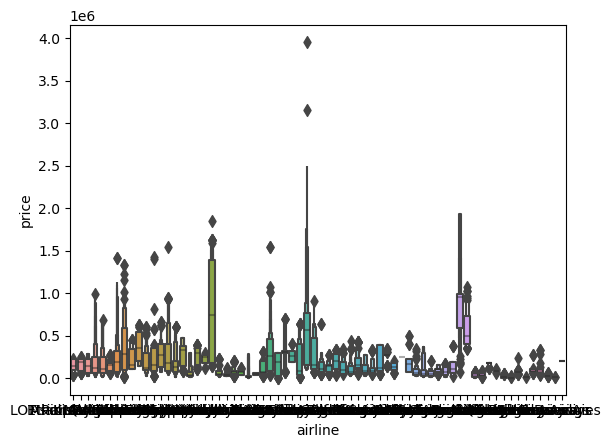

<Figure size 2000x800 with 0 Axes>

In [188]:
sns.boxenplot(data=local_ty,y=df['price'],x=df['airline'])
x=local_ty['airline'].value_counts().head(10)
y=local_ty['price']
plt.figure(figsize=(20,8))

### Does price vary depending on flight Duration?

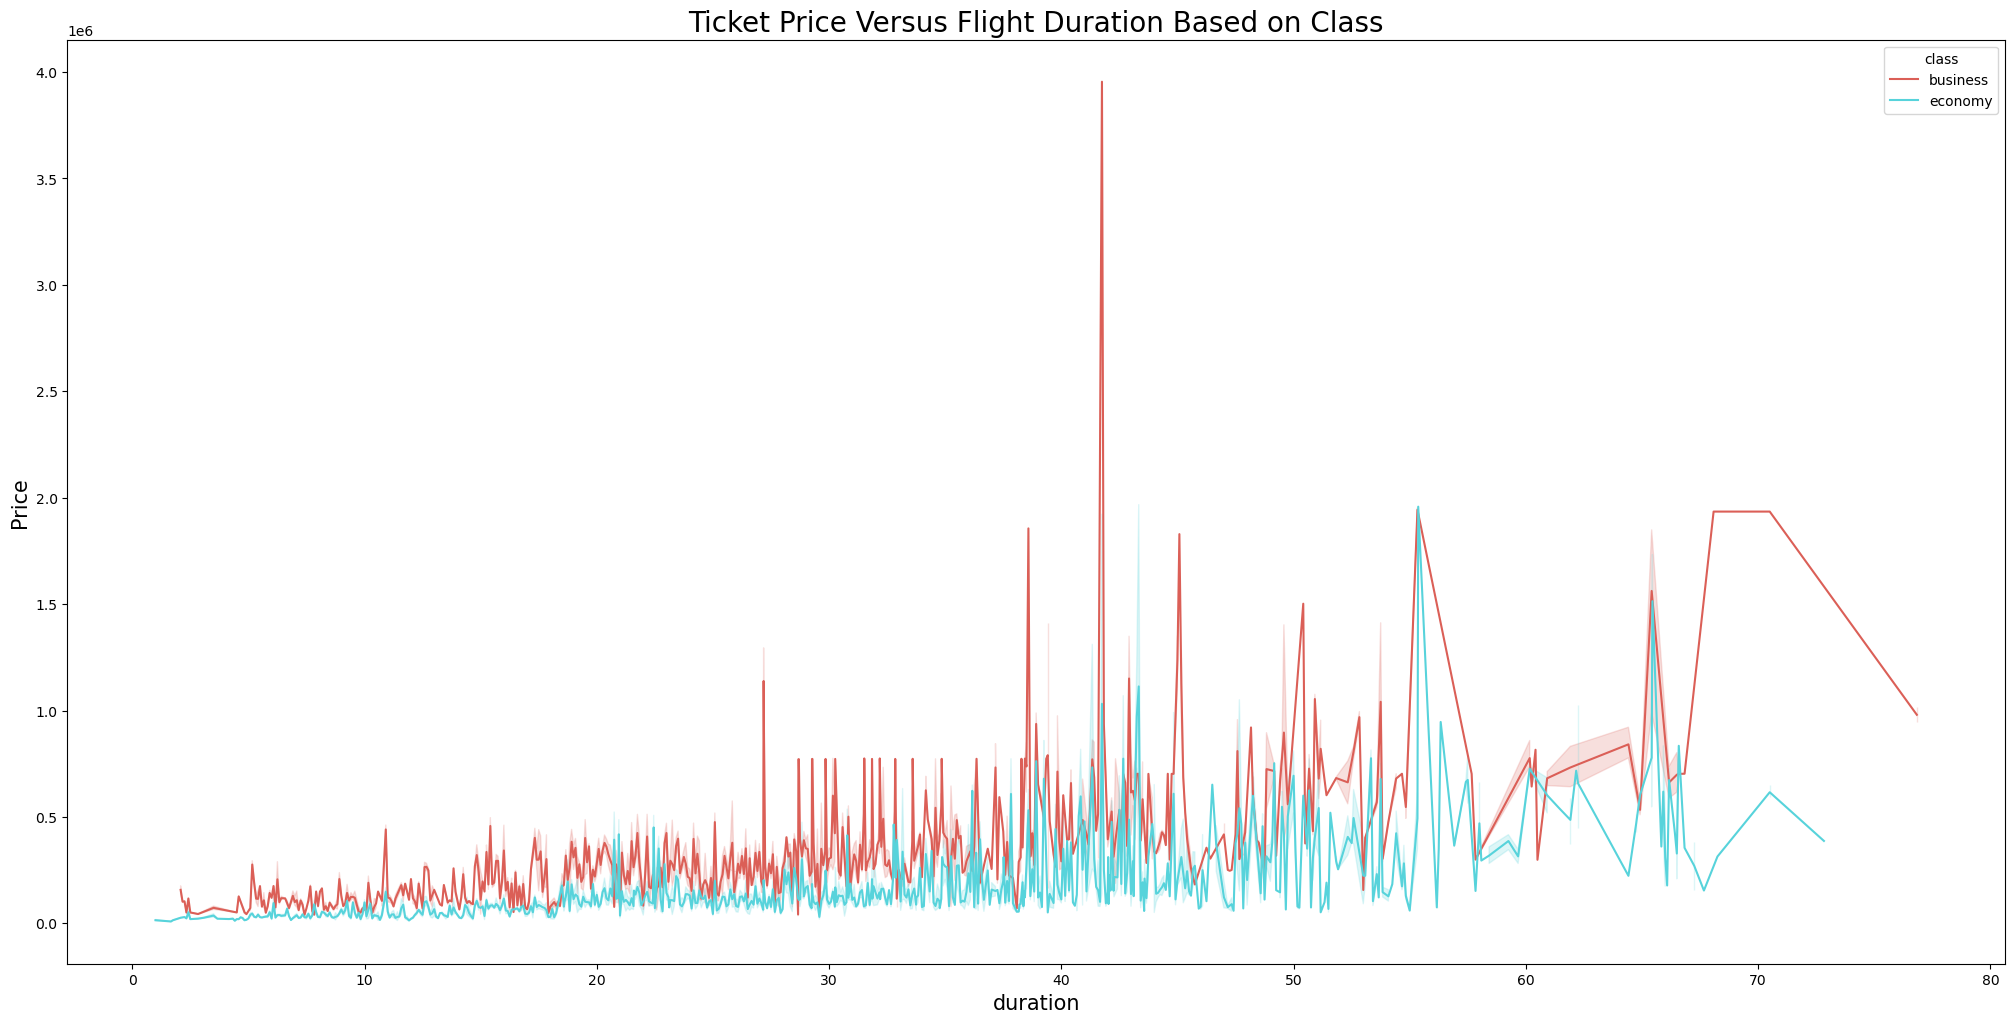

In [ ]:
plt.figure(figsize=(25,12))
sns.lineplot(data=df,y=df['price'],x=df['duration'],hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

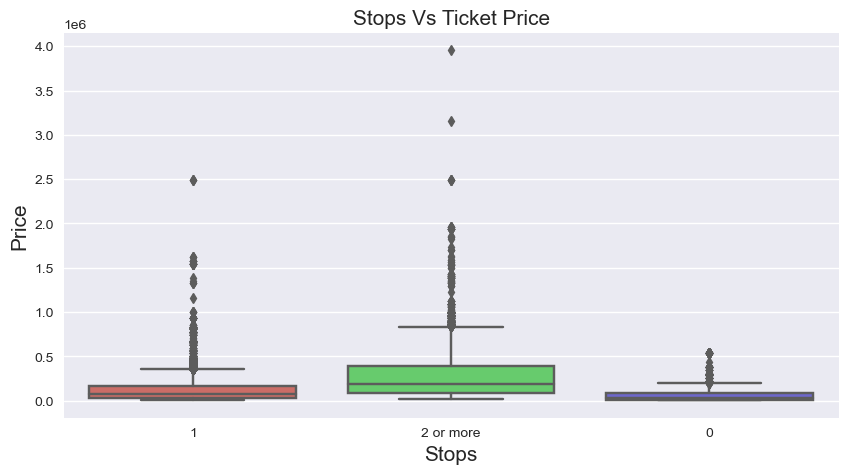

In [ ]:

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.boxplot(x=df['if_stop'],y=df['price'],data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

<AxesSubplot:xlabel='days left', ylabel='price'>

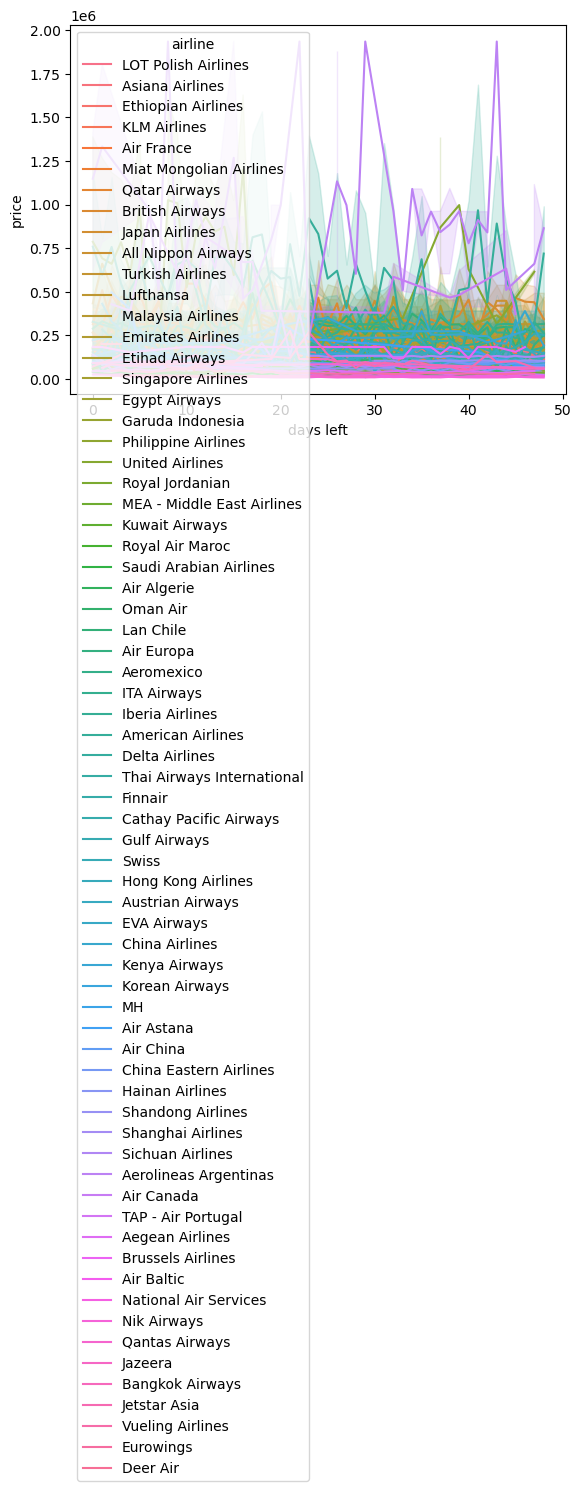

In [288]:
sns.lineplot(data=df,x=df['days left'],y=df['price'],hue=df['airline'])

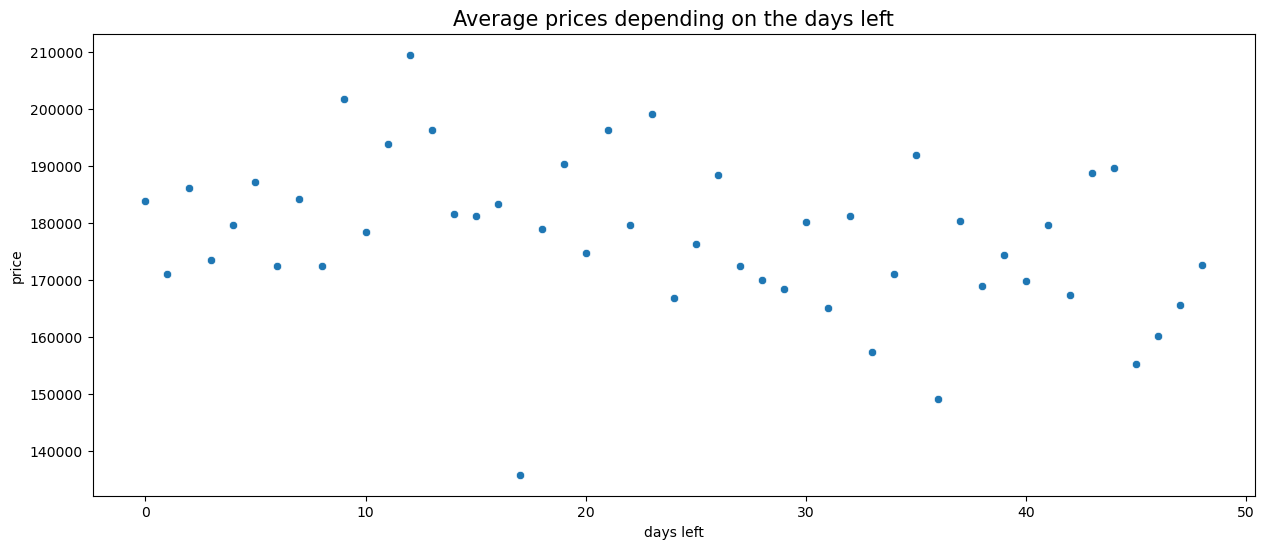

In [292]:
df_temp = df.groupby(['days left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days left", y="price", data=df_temp).set_title("Average prices depending on the days left",fontsize=15)

In [ ]:
fp[['from','to','stops']]

,from,to,stops
0,IST,NRT,[WAW]
1,IST,NRT,[ICN]
2,IST,NRT,[ADD]
3,IST,NRT,[WAW]
4,IST,NRT,"[CDG, AMS]"
...,...,...,...
23083,PEK,PVG,[HET]
23084,PEK,SHA,None
23085,PEK,PVG,[CSX]
23086,PEK,PVG,[CTU]


In [164]:
ana=fp.loc[fp['airline'].value_counts()>1000]
list(fp['airline'].value_counts()>1000)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
eco=fp.loc[ (fp['class'] == 'economy') ]
bus=fp.loc[ (fp['class'] != 'economy') ]

In [ ]:
eco.groupby(['if_stop'],as_index=False)['price'].mean()

,if_stop,price
0,0,36218.668614
1,1,77120.125257
2,2 or more,192226.492191


In [ ]:
bus.groupby(['if_stop'],as_index=False)['price'].mean()

,if_stop,price
0,0,193214.783037
1,1,224402.121242
2,2 or more,390013.105037


## How the Ticket Price change based on the Departure Time and Arrival Time?

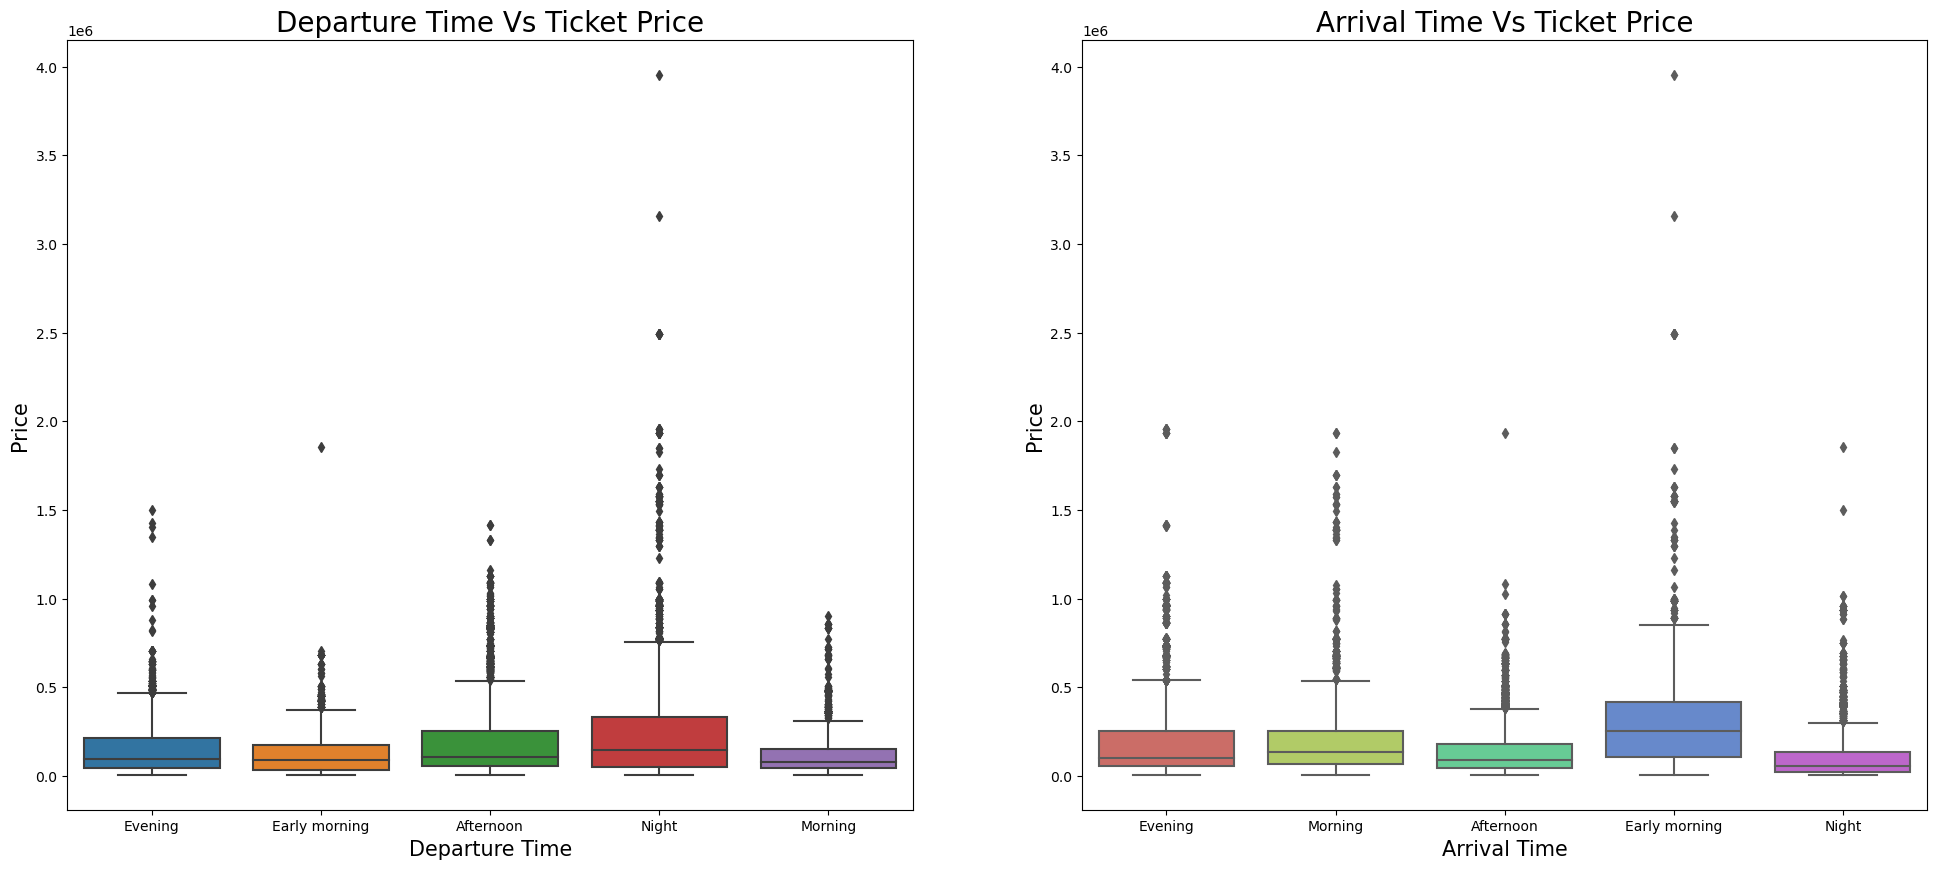

In [225]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arriving time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<AxesSubplot:xlabel='if_stop', ylabel='price'>

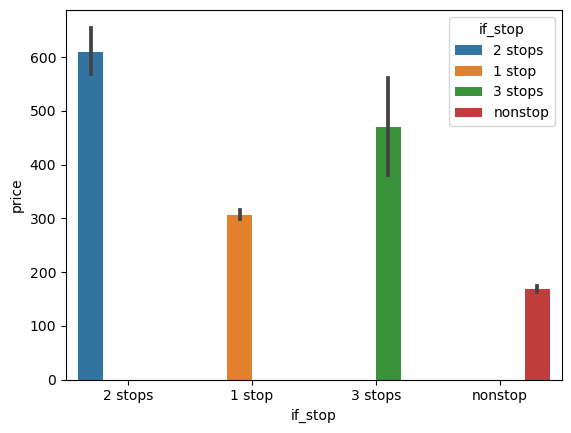

In [ ]:

sns.barplot(y = "price", x = "if_stop",hue="if_stop",data = fp.loc[fp["class"]=='economy'].sort_values("price", ascending = False))
#axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
#sns.barplot(y = "price", x = "airline",hue="if_stop",data = fp.loc[fp["class"]=='business'].sort_values("price", ascending = False), ax=axs[1])
#axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

## Does flights increase during weekend?

In [104]:
#average flights in weekends 

one=df.loc[df['weekends']==1]
len(one)/len(one['dep_date'].unique())

412.0

In [105]:
#average flights in the rest of the week

zero=df.loc[df['weekends']==0]
len(zero)/len(zero['dep_date'].unique())

395.5

# bring the weekend of every departure country and adjust the 'weekends' column

# Modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV

In [381]:
df2=fp[['departure time','arriving time','class','if_stop','price','days left','distance']]
df2

,departure time,arriving time,class,if_stop,price,days left,displacment
0,Afternoon,Afternoon,business,1,200560,103,7942.14
1,Afternoon,Afternoon,business,1,201696,103,7942.14
2,Night,Evening,business,1,220759,103,3712.81
3,Afternoon,Morning,business,1,226043,103,7942.14
4,Afternoon,Afternoon,business,1,229108,103,7942.14
...,...,...,...,...,...,...,...
43204,Afternoon,Evening,economy,1,68244,0,412.71
43205,Morning,Morning,economy,0,70850,0,1074.90
43206,Early morning,Afternoon,economy,1,80920,0,1354.73
43207,Afternoon,Night,economy,1,100825,0,1556.35


In [382]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43209 entries, 0 to 43208
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   departure time  43209 non-null  object 
 1   arriving time   43209 non-null  object 
 2   class           43209 non-null  object 
 3   if_stop         43209 non-null  int64  
 4   price           43209 non-null  int32  
 5   days left       43209 non-null  int64  
 6   displacment     43209 non-null  float64
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 2.1+ MB


In [383]:
df2['class']=df2['class'].map({'economy':0,'business':1})
#df2['flight_type']=df2['flight_type'].map({'local':0,'global':1})
#df2['duration']=df2['duration'].astype(float)

C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_9700\2536739216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['class']=df2['class'].map({'economy':0,'business':1})


In [384]:
# Coverting the labels into a numeric form using Label Encoder
le=LabelEncoder()
for col in df2.columns:
    if df2[col].dtype=='object':
        df2[col]=le.fit_transform(df2[col])

C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_9700\4121578892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=le.fit_transform(df2[col])


In [385]:
df2

,departure time,arriving time,class,if_stop,price,days left,displacment
0,0,0,1,1,200560,103,7942.14
1,0,0,1,1,201696,103,7942.14
2,4,2,1,1,220759,103,3712.81
3,0,3,1,1,226043,103,7942.14
4,0,0,1,1,229108,103,7942.14
...,...,...,...,...,...,...,...
43204,0,2,0,1,68244,0,412.71
43205,3,3,0,0,70850,0,1074.90
43206,1,0,0,1,80920,0,1354.73
43207,0,4,0,1,100825,0,1556.35


In [386]:
x=df2.drop(columns=['price'])
y=df2['price']

In [387]:

x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.18,random_state=43)

In [388]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [389]:
models={
    "Linear":LinearRegression(),
    "knn":KNeighborsRegressor(),
    "decisiontree":DecisionTreeRegressor(),
    "randomforest":RandomForestRegressor(),
    "xgb":XGBRegressor(),
    'LGBM':LGBMRegressor(),
    #'KR':KernelRidge(),
    #'CAT':CatBoostRegressor()
}


In [390]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print(f"using model:{name}")
    print(f"train accuracy:{r2_score(y_train,y_pred_train)}")
    print(f"test accuracy:{r2_score(y_test,y_pred)}")
    
    print("_"*30)

using model:Linear
train accuracy:0.31437201156449457
test accuracy:0.3424483569179776
______________________________
using model:knn
train accuracy:0.7843577358010165
test accuracy:0.7238760203623718
______________________________
using model:decisiontree
train accuracy:0.9341368100368054
test accuracy:0.7922529985603677
______________________________
using model:randomforest
train accuracy:0.9201790220696734
test accuracy:0.8524383477941448
______________________________
using model:xgb
train accuracy:0.871358515207826
test accuracy:0.8670254014899157
______________________________
using model:LGBM
train accuracy:0.8012916273403987
test accuracy:0.8344702307921998
______________________________


In [318]:
from xgboost import XGBRegressor

model = XGBRegressor()
parameters = {
    'n_estimators': [5, 10, 15, 20,25],
    'max_depth': [5,10, 15, 20],
    'max_leaves': [5,10, 15, 20]
}
grid = GridSearchCV(model, parameters)
grid.fit(x_train,y_train)
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.9097949764787856
R2 Score of XGBoost Test: 0.865374560510704


In [319]:
grid.best_params_

{'max_depth': 10, 'max_leaves': 5, 'n_estimators': 10}

In [320]:
model = RandomForestRegressor()
parameters = {
    'max_depth': [5, 10, 15, 20],
    'max_leaf_nodes': [10, 15, 20, 25,35],
    'min_samples_leaf': [0.02,0.04,0.06,0.08,0.4],
    'min_samples_split':[5,10,15,20]
}


grid = GridSearchCV(model, parameters)
grid.fit(x_train,y_train)
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

KeyboardInterrupt: 

In [ ]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
import joblib

In [ ]:
joblib.dump(         xgb, 'model.h5')

In [ ]:
 df = pd.DataFrame.from_dict(
            {

                'sex':['Male']
            }
        )

df.head()